This implementation analyzes the degree correlation k_nn(k) of a real-world email network and compares it with an ensemble of randomized networks generated using the configuration model. It first computes the average neighbor degree for each degree k in the real graph. Then, it constructs 100 configuration model graphs by randomly rewiring edges while preserving the degree sequence. The k_nn(k) values are averaged across all random graphs and plotted alongside the real graph to study degree correlations.


Loaded graph with 1005 nodes and 16706 edges
Computing KNN vs k for the real-world network...

Real-world network KNN vs k:
Degree k   Average Neighbor Degree knn(k)
-----------------------------------
1          71.8846                  
2          55.5000                  
3          61.2778                  
4          65.7121                  
5          67.9643                  
6          69.1508                  
7          69.8114                  
8          75.0563                  
9          83.3185                  
10         76.1214                  
11         69.2364                  
12         54.9611                  
13         63.6442                  
14         70.4592                  
15         64.6810                  
16         59.9010                  
17         59.5948                  
18         80.1852                  
19         63.8702                  
20         74.7694                  
21         62.1079                  
22         70.4403   

Random Graphs: 100%|██████████| 100/100 [00:02<00:00, 40.64it/s]



Configuration model average KNN vs k (100 instances):
Degree k   Average Neighbor Degree knn(k)
-----------------------------------
1          66.4553                  
2          66.8405                  
3          66.9300                  
4          66.0283                  
5          66.9389                  
6          66.3659                  
7          66.2283                  
8          67.0001                  
9          66.5621                  
10         65.7803                  
11         66.2555                  
12         66.6325                  
13         66.3885                  
14         66.0513                  
15         66.2106                  
16         66.4574                  
17         66.4346                  
18         66.3284                  
19         66.7504                  
20         65.9985                  
21         66.0349                  
22         66.0108                  
23         66.3414                  
24         65.80

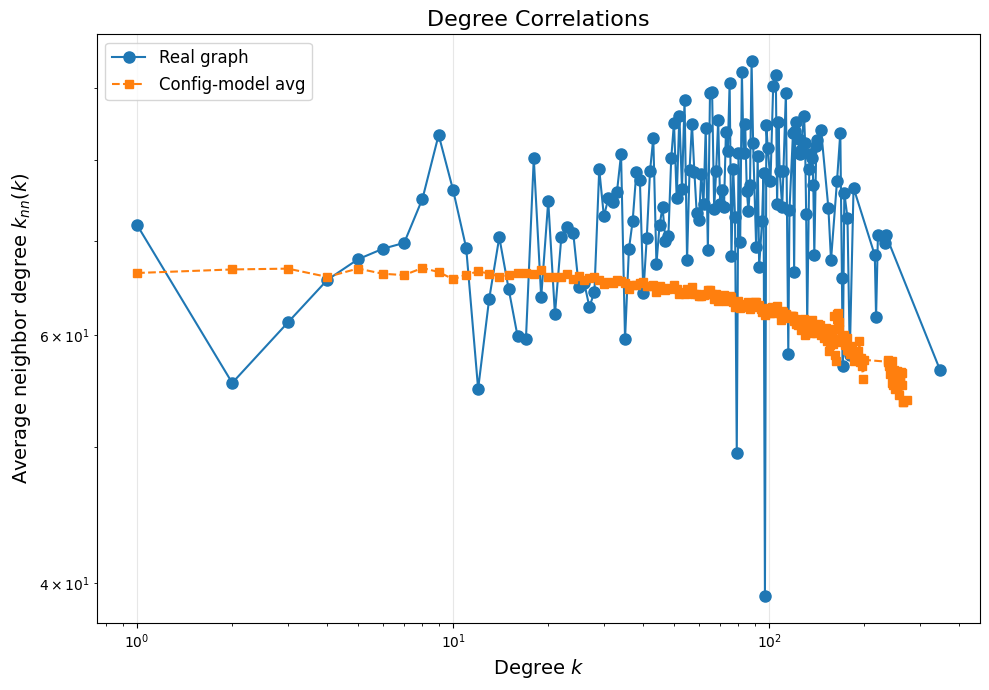


Assortativity coefficient for real network: -0.0110


Random Assortativity: 100%|██████████| 100/100 [00:05<00:00, 18.50it/s]

Average assortativity coefficient for random networks: -0.0447 ± 0.0063


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from tqdm import tqdm  # Optional: for progress tracking

# Load the graph
file_path = 'email-Eu-core.txt'
G = nx.read_edgelist(file_path, nodetype=int)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

def knn_curve(G):
    """Calculate average neighbor degree for each degree k"""
    knn = nx.average_neighbor_degree(G)
    by_k = defaultdict(list)
    for n, d in G.degree():
        by_k[d].append(knn[n])
    ks = sorted(by_k)
    return ks, [np.mean(by_k[k]) for k in ks]

def configuration_model(G):
    """Generate a random graph with the same degree sequence"""
    stubs = []
    for n, d in G.degree():
        stubs += [n]*d
    np.random.shuffle(stubs)
    H = nx.Graph()
    H.add_nodes_from(G.nodes())
    while stubs:
        # If only one stub remains, break to avoid index error
        if len(stubs) < 2:
            break
        u = stubs.pop(); v = stubs.pop()
        if u != v:  # Avoid self-loops
            H.add_edge(u, v)
    return H

# Compute KNN vs k for the real-world network
print("Computing KNN vs k for the real-world network...")
ks_real, knn_real = knn_curve(G)

# Print the real-world network KNN values
print("\nReal-world network KNN vs k:")
print(f"{'Degree k':<10} {'Average Neighbor Degree knn(k)':<25}")
print("-" * 35)
for k, knn in zip(ks_real, knn_real):
    print(f"{k:<10} {knn:<25.4f}")

# Random config model average
print("\nGenerating random graphs and computing average KNN...")
instances = 100
sum_knn = defaultdict(float)
count_knn = defaultdict(int)

for i in tqdm(range(instances), desc="Random Graphs"):
    H = configuration_model(G)
    ks_h, knn_h = knn_curve(H)
    for k, val in zip(ks_h, knn_h):
        sum_knn[k] += val
        count_knn[k] += 1

ks_conf = sorted(sum_knn)
knn_conf = [sum_knn[k]/count_knn[k] for k in ks_conf]

# Print the configuration model average KNN values
print("\nConfiguration model average KNN vs k (100 instances):")
print(f"{'Degree k':<10} {'Average Neighbor Degree knn(k)':<25}")
print("-" * 35)
for k, knn in zip(ks_conf, knn_conf):
    print(f"{k:<10} {knn:<25.4f}")

# Plot the results
plt.figure(figsize=(10, 7))
plt.loglog(ks_real, knn_real, 'o-', label='Real graph', markersize=8)
plt.loglog(ks_conf, knn_conf, 's--', label='Config-model avg', markersize=6)
plt.xlabel('Degree $k$', fontsize=14)
plt.ylabel(r'Average neighbor degree $k_{nn}(k)$', fontsize=14)
plt.legend(fontsize=12)
plt.title('Degree Correlations', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the figure (optional)
plt.savefig('knn_correlations.png', dpi=300)
plt.show()

# Calculate correlation coefficient (assortativity coefficient)
r = nx.degree_assortativity_coefficient(G)
print(f"\nAssortativity coefficient for real network: {r:.4f}")

# Calculate average assortativity for random networks
random_assort = []
for i in tqdm(range(instances), desc="Random Assortativity"):
    H = configuration_model(G)
    r_h = nx.degree_assortativity_coefficient(H)
    random_assort.append(r_h)

print(f"Average assortativity coefficient for random networks: {np.mean(random_assort):.4f} ± {np.std(random_assort):.4f}")

ANALYSIS:
The plot compares the degree correlation k_nn(k)—the average degree of neighbors of nodes with degree k—for the real-world email network (blue curve) and an ensemble of 100 randomized configuration models (orange curve).

Real Network: The real graph exhibits noticeable degree correlations, with a rising trend at lower degrees and more variability at higher degrees. This suggests assortative mixing for small-to-mid degree nodes (i.e., nodes tend to connect to similarly connected nodes), and complex structural patterns not captured by randomness.

Configuration Model: The randomized graphs generated by the configuration model show a flat or slightly decreasing trend, reflecting no significant degree correlation. This is expected, as the configuration model preserves only the degree sequence but randomizes the connections.

Conclusion: The contrast between the two curves indicates that the real-world email network has non-random structural properties, possibly due to community structure or functional organization, which are absent in the random models.

